In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
batch_size = 1
kwargs = {}#{'num_workers': 1, 'pin_memory': True}

In [3]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor()), batch_size=batch_size, shuffle=True, **kwargs)

In [4]:
test_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=False, 
                                                          download=True, 
                                                          transform=transforms.ToTensor()), 
                                                       batch_size=batch_size, shuffle=True, **kwargs)

In [5]:
device = torch.device("cuda")
torch.cuda.init()

In [6]:
def oneHot(target):
    onehot = torch.zeros(10, device=device)
    onehot[target] = 1
    return onehot

In [7]:
BCE = torch.nn.BCELoss()

In [8]:
w1 = torch.randn(32, 784, requires_grad=True, device=device)
b1 = torch.randn(32, requires_grad=True, device=device)

w2 = torch.randn(10, 32, requires_grad=True, device=device)
b2 = torch.randn(10, requires_grad=True, device=device)


learning_rate = 0.0001
optimizator = torch.optim.Adam([w1, b1, w2, b2], lr=learning_rate)

In [10]:
import torch.nn.functional as F

for _ in range(30):
    tot_loss = 0
    for data, target in train_loader:
        x = data.reshape(784).cuda()
        y = oneHot(target)

        a1_ = torch.nn.ReLU()(torch.mv(w1,x)+b1)
        a2_ = torch.nn.Sigmoid()(torch.mv(w2,a1_)+b2)
        
        loss = BCE(a2_, y)
        
        optimizator.zero_grad()
        loss.backward()
        optimizator.step()
        tot_loss += loss
    tot_loss = tot_loss / 60000
    print(tot_loss)

tensor(1.4017, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3435, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2144, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1560, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1224, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1013, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0868, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0767, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0689, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0633, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0585, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0548, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0516, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0490, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0469, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0451, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0435, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0421, device='cuda:0', grad_fn=<DivBack

KeyboardInterrupt: 

In [11]:
cnt = 0
for data, target in test_loader:
    x = data.reshape(784).cuda()
    
    a1_ = torch.nn.ReLU()(torch.mv(w1,x)+b1)
    a2_ = torch.nn.Sigmoid()(torch.mv(w2,a1_)+b2)

    y_ = a2_.to(torch.device("cpu")).argmax()
    
    if y_ == target:
        cnt += 1
cnt/10000

0.938

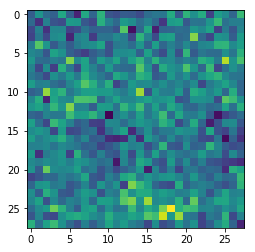

In [14]:
plt.imshow(w1.cpu()[1].detach().numpy().reshape(28, 28))